In [15]:
# CELL1 – 1 mark


################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################
cw = pd.read_table(r"2017Health.txt", index_col=['County'])
cw = cw.drop('State', axis=1)
frame = DataFrame(cw)
frame

                    




Populating the interactive namespace from numpy and matplotlib


,Years of Potential Life Lost Rate,Teen Birth Rate,Violent Crime Rate,Percentage Smokers
County,,,,
Alachua,6633,19,579,16
Baker,8270,58,360,19
Bay,9168,50,508,18
Bradford,10346,61,461,18
Brevard,7722,25,518,16
...,...,...,...,...
Taylor,7875,64,743,18
Volusia,8295,32,426,16
Wakulla,7548,31,272,17


In [16]:
# CELL2 – 5 marks
cell2 = cw['Percentage Smokers']
value = cell2.values 
stdvalue = round(std(cw['Percentage Smokers']),2)
meanvalue = round(cw['Percentage Smokers'].mean(),2)
err = round(1.96*std(value)/sqrt(len(value)), 2)
print("Mean of % Smokers is: " + str(meanvalue))
print("Minimum of % Smokers is: " + str(round(cw['Percentage Smokers'].min(),1)))
print("Maximum of % Smokers is: " + str(round(cw['Percentage Smokers'].max(),1)))
print("Standard deviation of % Smokers is: " + str(stdvalue))
print('95% confidence level of % Smokers is: ' + '[', round(meanvalue-err,3) , round(meanvalue+err,3), ']')








Mean of % Smokers is: 16.92
Minimum of % Smokers is: 11
Maximum of % Smokers is: 21
Standard deviation of % Smokers is: 2.37
95% confidence level of % Smokers is: [ 16.35 17.49 ]


(0.0, 18.0)

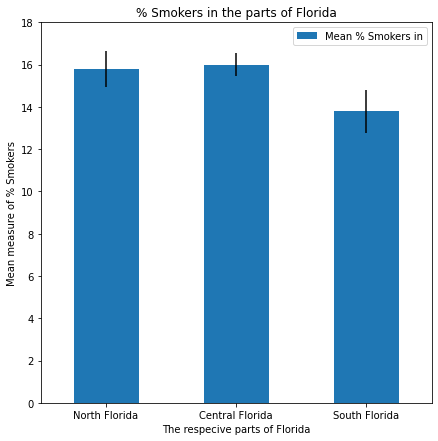

In [17]:
# CELL3 – 6 marks

dicts = {"North Florida" : ["Duval", "Alachua", "Leon", "Flagler", "Marion"], 
         "Central Florida" : ["Orange", "Polk", "Hillsborough", "Pinellas", "Brevard"],
        "South Florida" : ["Miami-Dade", "Broward", "Lee", "Palm Beach", "Sarasota"]}
cell2 = cw['Percentage Smokers']
nf_value = cell2[dicts.get("North Florida")]
cf_value = cell2[dicts.get("Central Florida")]
sf_value = cell2[dicts.get("South Florida")]
nf_err = round(1.96*std(nf_value)/sqrt(len(nf_value)), 2)
cf_err = round(1.96*std(cf_value)/sqrt(len(cf_value)), 2)
sf_err = round(1.96*std(sf_value)/sqrt(len(sf_value)), 2)
nf_mean_value = mean(nf_value)
sf_mean_value = mean(cf_value)
cf_mean_value = mean(sf_value)
cell3 = pd.DataFrame({"Mean % Smokers in" : [nf_mean_value,sf_mean_value,cf_mean_value]}, 
                     index=['North Florida', 'Central Florida', 'South Florida'])

bars = cell3.plot.bar(rot=0, figsize=(7,7), yerr=[nf_err, cf_err, sf_err])
title('% Smokers in the parts of Florida')
xlabel("The respecive parts of Florida")
ylabel("Mean measure of % Smokers")
ylim(0, 18)








In [18]:
# CELL4 – 2 marks
YPLLR = cw['Years of Potential Life Lost Rate']
comb=cw[['Percentage Smokers', 'Teen Birth Rate']]
comb=sm.add_constant(comb)
results=sm.OLS(YPLLR, comb).fit()
print(results.summary())
slope_ps=results.params[1]
slope_tbr=results.params[2]
intercept=results.params[0]
print ('OLS slope of Percentage Smokers = ', round(slope_ps,2))
print ('OLS slope of Teen Birth Rate = ', round(slope_tbr,2))
print ('OLS intercept = ', round(intercept, 2))
print ('Regression model: YPLLR = ' + str(round(slope_ps,2)) + ' * Percentage Smokers + ' 
       + str(round(slope_tbr,2)) + ' * Teen Birth rate + '+str(round(intercept, 2)))



                                    OLS Regression Results                                   
Dep. Variable:     Years of Potential Life Lost Rate   R-squared:                       0.423
Model:                                           OLS   Adj. R-squared:                  0.404
Method:                                Least Squares   F-statistic:                     23.05
Date:                               Mon, 27 Jul 2020   Prob (F-statistic):           3.08e-08
Time:                                       13:47:04   Log-Likelihood:                -557.69
No. Observations:                                 66   AIC:                             1121.
Df Residuals:                                     63   BIC:                             1128.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                         coef    std err          t      P>|

In [19]:
# CELL5 – 6 marks
YPLLR = cw["Years of Potential Life Lost Rate"]
TBR = cw["Teen Birth Rate"]
VCR = cw["Violent Crime Rate"]
YPLLR_A = 60.6*TBR + 5297.06
YPLLR_B = 1.36*VCR + 7254.3
aerror_YPLLR = abs(results.predict() - YPLLR)
aerror_A=abs(YPLLR_A - YPLLR)
aerror_B=abs(YPLLR_B - YPLLR)
MAE_A=mean(aerror_A)
MAE_B=mean(aerror_B)
####################MAE###################################
print('MAE on Model A = ', round(MAE_A,2))
print('MAE on Model B = ', round(MAE_B,2))
####################NORMALITY_TEST###################################
print ("Is absolute error for model А normal?", stats.shapiro(aerror_A)[1]>0.05)
print ("Is absolute error for model B normal?", stats.shapiro(aerror_B)[1]>0.05)
#####################SIGNIFICANCE_TEST###################################
print ("Is the diffrence significant?", stats.mannwhitneyu(aerror_A,aerror_B, alternative = 'two-sided')[1]<0.05)
print("Significance test of pvalue :", stats.mannwhitneyu(aerror_A,aerror_B, alternative = 'two-sided')[1])
#####################CONCLUSION###################################
print("In conclusion, the diffrence is insignificant, but the MAE of Model A is more accurate than the one of Model B and that would be the reason of me suggesting model A")

MAE on Model A =  948.46
MAE on Model B =  1219.42
Is absolute error for model А normal? False
Is absolute error for model B normal? False
Is the diffrence significant? False
Significance test of pvalue : 0.05225048924803222
In conclusion, the diffrence is insignificant, but the MAE of Model A is more accurate than the one of Model B and that would be the reason of me suggesting model A
